## Chain rule (recap)

$$
x = w^2
$$
$$
y = \sin(x)
$$
$$
z = \cos(y)
$$

$$
{dx \over dw} = 2w
$$

$$
{dy \over dw } = \sin(w^2)^\prime = \cos(w^2)\ (w^2)^\prime = \cos(w^2)\ 2w
$$

$$
= \cos(x)\ 2w = {dy \over dx }{dx \over dw }
$$

$$
{dz \over dw } = \cos(\sin(w^2)))^\prime = -\sin(\sin(w^2))\ \sin(w^2)^\prime = -\sin(\sin(w^2))\ \cos(w^2)\ (w^2)^\prime = -\sin(\sin(w^2))\ \cos(w^2)\ 2w
$$

$$
= -\sin(y)\ \cos(x)\ 2w = {dz \over dy }{dy \over dx }{dx \over dw }
$$

intuition:

- z가 y의 함수이고 y가 x의 함수이고 x가 w의 함수라 하자.
- w에 대한 z의 변화율은 중간 부분 부분의 변화율들인 dz/dy, dy/dx, dx/dw의 곱으로 나타낼 수 있다.
- 즉, 부분부분의 변화율만 알면 그 부분부분을 이어 붙인 어떤 관계라도 처음과 끝 사이의 변화율을 계산할수 있다.

$$
z = x + y
$$

$$
{dz \over dx} = 1
$$

$$
{dz \over dy} = 1
$$

$$
z = xy
$$

$$
{dz \over dx} = y
$$

$$
{dz \over dy} = x
$$

## Forward propagation

$$
z_1^{(i)[1]} = x_1 w_{11}^{[1]} + x_2 w_{12}^{[1]} + b_0 w_{13}^{[1]}
$$

$$
a_1^{(i)[1]} = g(z_1^{[1]})
$$

$$
z_1^{(i)[2]} = a_1^{(i)[1]} w_{11}^{[2]} + a_2^{(i)[1]} w_{12}^{[2]} + b_1 w_{13}^{[2]}
$$

$$
a_1^{(i)[2]} = g(z_1^{(i)[2]})
$$

$$
\hat{y}^{(i)} = a_1^{(i)[2]} w_{11}^{[3]} + a_2^{(i)[2]} w_{12}^{[3]} + b_2 w_{13}^{[3]}
$$

$$
J = {1 \over m} \sum\limits_{i} (\hat{y}^{(i)} - y^{(i)})^2
$$

## Backward propagation

$$
{\partial{J} \over \partial{\hat{y}}^{(i)}} = {2 \over m} (\hat{y}^{(i)} - y^{(i)})
$$

$$
{\partial \hat{y}^{(i)} \over \partial{w_{11}^{[3]}}} = a_1^{(i)[2]}
$$

$$
{\partial \hat{y}^{(i)} \over \partial a_1^{(i)[2]}} = {w_{11}^{[3]}}
$$

## weight initialization

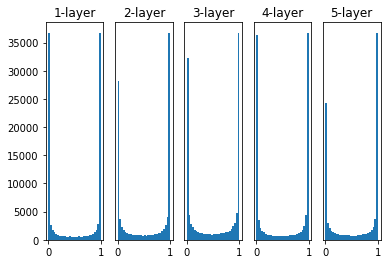

In [140]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)


node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장
input_data = np.random.randn(1000, 100)  # 1000개의 데이터

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
#     w = np.random.randn(node_num, node_num) * 1
#     w = np.random.randn(node_num, node_num) * 0.01
#     w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
#     w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

    a = np.dot(x, w)

    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
#     z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0:
        plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0, 1))

plt.show()

## Snippets

$$
{\partial{L} \over \partial{w_{11}^{[3]}}} = {\partial{L} \over \partial a}{\partial a \over \partial b}{\partial b \over \partial c}{\partial c \over \partial {w_{11}^{[3]}}}
$$

$$
{\partial{J} \over \partial{w_{11}^{[3]}}} = \sum\limits_{i}{\partial{J} \over \partial\hat{y}^{(i)}}{\partial\hat{y}^{(i)} \over \partial{w_{11}^{[3]}}}
$$

$$
{\partial{J} \over \partial{a_1^{(i)[2]}}} = {\partial{J} \over \partial \hat{y}^{(i)}}{\partial \hat{y}^{(i)} \over \partial{a_1^{(i)[2]}}}
$$

$$
{\partial{J} \over \partial{z_1^{(i)[2]}}} = {\partial{J} \over \partial \hat{y}^{(i)}}{\partial \hat{y}^{(i)} \over \partial{a_1^{(i)[2]}}}{\partial{a_1^{(i)[2]}} \over \partial{z_1^{(i)[2]}}}
$$

$$
{\partial{J} \over \partial{w_{11}^{[2]}}} = \sum\limits_{i}{\partial{J} \over \partial\hat{y}^{(i)}}{\partial\hat{y}^{(i)} \over \partial{a_1^{(i)[2]}}}{\partial{a_1^{(i)[2]}} \over \partial{z_1^{(i)[2]}}}{\partial{z_1^{(i)[2]}} \over \partial{w_{11}^{[2]}}}
$$

$$
{\partial J \over \partial a_1^{(i)[1]}} = \sum\limits_j{\partial{J} \over \partial\hat{y}^{(i)}}{\partial\hat{y}^{(i)} \over \partial{a_j^{(i)[2]}}}{\partial{a_j^{(i)[2]}} \over \partial{z_j^{(i)[2]}}}{\partial{z_j^{(i)[2]}} \over \partial{a_1^{(i)[1]}}}
$$

In [114]:
from functools import reduce
from IPython.display import display, Markdown, Latex

display_b = False

x = [f"x_{{{n}}}^{{(i)}}" for n in range(1, 3)] + ["b^{[0]}"]
z_1 = [
    reduce(
        lambda e1, e2: f"{e1} + {e2}",
        [f"{x[n]}w_{{{m+1}{n+1}}}^{{[1]}}" for n in range(len(x))],
    )
    for m in range(2)
]
a_1 = [f"g({z})" for z in z_1] + ["b^{[1]}"]
z_2 = [
    reduce(
        lambda e1, e2: f"{e1} + {e2}",
        [f"{a_1[n]}w_{{{m+1}{n+1}}}^{{[2]}}" for n in range(len(a_1))],
    )
    for m in range(2)
]
a_2 = [f"g({z})" for z in z_2] + ["b^{[2]}"]

y_hat = reduce(
    lambda e1, e2: f"{e1} + {e2}",
    [f"{a_2[n]} w_{{1{n+1}}}^{{[3]}}" for n in range(len(a_2))],
)
display(Markdown(f"---"))
# display(Markdown(f"$$\nz_1^{{(i)[1]}} = {z_1[0]}\n$$"))
# display(Markdown(f"$$\nz_2^{{(i)[1]}} = {z_1[1]}\n$$"))
# display(Markdown(f"$$\na_1^{{(i)[1]}} = {a_1[0]}\n$$"))
# display(Markdown(f"$$\na_2^{{(i)[1]}} = {a_1[1]}\n$$"))
# display(Markdown(f"$$\nz_1^{{(i)[2]}} = {z_2[0]}\n$$"))
# display(Markdown(f"$$\nz_2^{{(i)[2]}} = {z_2[1]}\n$$"))
# display(Markdown(f"$$\na_1^{{(i)[2]}} = {a_2[0]}\n$$"))
# display(Markdown(f"$$\na_2^{{(i)[2]}} = {a_2[1]}\n$$"))
# display(Markdown(f"---"))
display(Markdown(f"$$\n\\hat{{y}}^{{(i)}} = {y_hat}\n$$"))
display(Markdown(f"---"))
display(Markdown(f"$$\nJ = {{1 \\over m}} \\sum\\limits_i ({y_hat} - y^{{(i)}})^2\n$$"))
display(Markdown(f"---"))

---

$$
\hat{y}^{(i)} = g(g(x_{1}^{(i)}w_{11}^{[1]} + x_{2}^{(i)}w_{12}^{[1]} + b^{[0]}w_{13}^{[1]})w_{11}^{[2]} + g(x_{1}^{(i)}w_{21}^{[1]} + x_{2}^{(i)}w_{22}^{[1]} + b^{[0]}w_{23}^{[1]})w_{12}^{[2]} + b^{[1]}w_{13}^{[2]}) w_{11}^{[3]} + g(g(x_{1}^{(i)}w_{11}^{[1]} + x_{2}^{(i)}w_{12}^{[1]} + b^{[0]}w_{13}^{[1]})w_{21}^{[2]} + g(x_{1}^{(i)}w_{21}^{[1]} + x_{2}^{(i)}w_{22}^{[1]} + b^{[0]}w_{23}^{[1]})w_{22}^{[2]} + b^{[1]}w_{23}^{[2]}) w_{12}^{[3]} + b^{[2]} w_{13}^{[3]}
$$

---

$$
J = {1 \over m} \sum\limits_i (g(g(x_{1}^{(i)}w_{11}^{[1]} + x_{2}^{(i)}w_{12}^{[1]} + b^{[0]}w_{13}^{[1]})w_{11}^{[2]} + g(x_{1}^{(i)}w_{21}^{[1]} + x_{2}^{(i)}w_{22}^{[1]} + b^{[0]}w_{23}^{[1]})w_{12}^{[2]} + b^{[1]}w_{13}^{[2]}) w_{11}^{[3]} + g(g(x_{1}^{(i)}w_{11}^{[1]} + x_{2}^{(i)}w_{12}^{[1]} + b^{[0]}w_{13}^{[1]})w_{21}^{[2]} + g(x_{1}^{(i)}w_{21}^{[1]} + x_{2}^{(i)}w_{22}^{[1]} + b^{[0]}w_{23}^{[1]})w_{22}^{[2]} + b^{[1]}w_{23}^{[2]}) w_{12}^{[3]} + b^{[2]} w_{13}^{[3]} - y^{(i)})^2
$$

---